# EDA_Olympics_Exercises

In [1]:
# Import data modules
import pandas as pd
import numpy as np

# Import date modules
from datetime import datetime
from dateutil.relativedelta import relativedelta

# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

# Set plotting parameters
%matplotlib inline
rcParams['figure.figsize'] = 10, 5

## 1. What was the average age in male and female athletes?

In [2]:
# Read in athlete data
athletes = pd.read_csv('data/athletes.csv')
athletes.dtypes

id               int64
name            object
nationality     object
sex             object
dob             object
height         float64
weight         float64
sport           object
gold             int64
silver           int64
bronze           int64
dtype: object

In [3]:
# Head of athlete data
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [4]:
# Opening day of 2016 Olympics
day0 = datetime.strptime('08/05/16', '%m/%d/%y')
print(day0)

2016-08-05 00:00:00


In [5]:
# Create function to calculate age for each athlete (if DOB present)
def Age(row):
    try:
        dt = datetime.strptime(row['dob'], '%m/%d/%y')
        return relativedelta(day0, dt).years
    except:
        pass

In [6]:
# Apply 'Age' function to atheletes data set
athletes['age'] = athletes.apply(lambda x: Age(x), 1)
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0,46.0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0,29.0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1,24.0
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0,25.0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0,25.0


In [7]:
# Calculate average age among male and female athletes
athletes.groupby('sex').age.mean()

sex
female    25.444188
male      26.024321
Name: age, dtype: float64

## 2. What are the most common Dates of Birth?

*To clarify - day, month, year*

In [8]:
# Group athletes by date of birth
by_dob = athletes.groupby('dob')['id'].count().reset_index()
by_dob.columns = ['dob', 'count']
by_dob = by_dob.sort_values(by = 'count', ascending = False)

In [9]:
# View top results
by_dob.head()

,dob,count
2699,3/5/88,9
1997,2/18/93,9
1573,12/20/90,9
1472,12/14/89,8
4169,6/9/89,8


## 3. How about the most common birthdays?

*To clarify - day, month*

In [10]:
# Parse dob strings to extract birthday without year
def Date(row):
    try:
        return str(row['dob'].split('/')[:2])
    except:
        pass

In [11]:
# Apply 'Date' function to athletes data set
birthdates = athletes.apply(lambda x: Date(x), 1)
birthdates = pd.DataFrame(birthdates)
birthdates.columns = ['date']
birthdates.head()

,date
0,"['10', '17']"
1,"['9', '23']"
2,"['5', '27']"
3,"['1', '2']"
4,"['11', '26']"


In [12]:
# View top results
birthdates['date'].value_counts().reset_index().head()

,index,date
0,"['1', '1']",58
1,"['2', '5']",51
2,"['2', '10']",48
3,"['9', '19']",47
4,"['1', '20']",47


## 4. What are the Countries with more than 100 medals?

In [13]:
# 'Melt' data frame to count medals by country
medals = pd.melt(athletes, id_vars = ['nationality'],
                 value_vars = ['bronze', 'silver', 'gold'],
                 value_name = 'medal_count', var_name = 'medal')
medals.head()

,nationality,medal,medal_count
0,ESP,bronze,0
1,KOR,bronze,0
2,CAN,bronze,1
3,MDA,bronze,0
4,NZL,bronze,0


In [14]:
# Group by nationality
by_nation = medals.groupby('nationality')['medal_count'].sum().reset_index()
by_nation.head()

,nationality,medal_count
0,AFG,0
1,ALB,0
2,ALG,2
3,AND,0
4,ANG,0


In [15]:
# Select nations with more than 100 medals
by_nation = by_nation.sort_values(by = 'medal_count', ascending = False)
over100 = by_nation[by_nation['medal_count'] > 100]
over100

,nationality,medal_count
198,USA,264
72,GER,160
68,GBR,145
159,RUS,115
38,CHN,113


## 5. Create a bar or pie chart for the results of the previous exercise.

In [16]:
# Extract data from 'over100' data set
medals = over100['medal_count']
nations = over100['nationality']
y_pos = np.arange(len(nations))

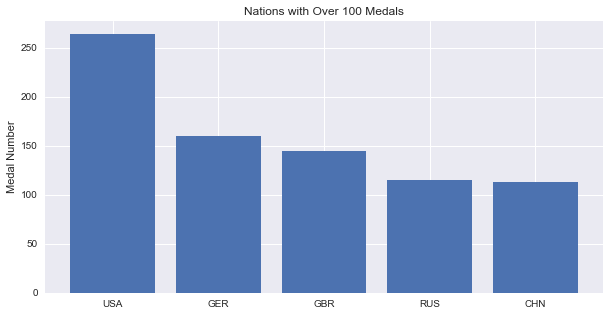

In [17]:
# Create plot
plt.bar(y_pos, medals, align = 'center')
plt.xticks(y_pos, nations)
plt.ylabel('Medal Number')
plt.title('Nations with Over 100 Medals')

# Save plot and show in notebook
plt.savefig('topNations.png')
plt.show()

## 6. Male weightlifting competitions are divided into 8 weight classes. Can you estimate these weight classes by looking at the data? Hint: Create a scatter plot with Body weight on the x-axis and choose height as y.

In [18]:
# Extract male weightlifters
male_lifters = athletes[(athletes['sex'] == 'male') & (athletes['sport'] == 'weightlifting')]
male_lifters.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,age
120,242818896,Adrian Edward Zielinski,POL,male,3/28/89,1.70,94.0,weightlifting,0,0,0,27.0
186,162169475,Ahmed Mohamed,EGY,male,4/27/88,1.85,144.0,weightlifting,0,0,0,28.0
189,101574216,Ahmed Saad,EGY,male,11/1/86,1.60,62.0,weightlifting,0,0,0,29.0
403,745034260,Alexandr Spac,MDA,male,11/21/89,1.64,77.0,weightlifting,0,0,0,26.0
405,928138606,Alexandr Zaichikov,KAZ,male,8/17/92,1.80,105.0,weightlifting,0,0,1,23.0


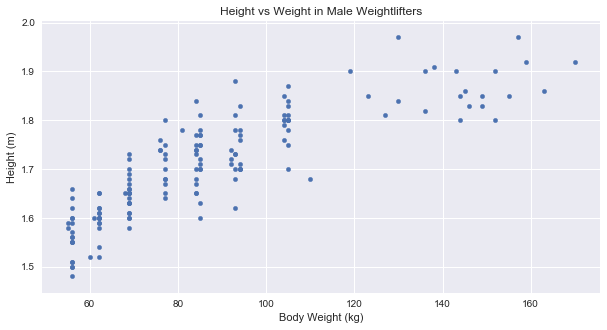

In [19]:
# Scatter plot
plt.scatter(male_lifters['weight'], male_lifters['height'], s = 20)
plt.title('Height vs Weight in Male Weightlifters')
plt.xlabel('Body Weight (kg)')
plt.ylabel('Height (m)')

# Save figure and show in notebook
plt.savefig('weightlifting.png')
plt.show()

Estimates of the 8 classes:
1. Under 60 kg
2. 60-65 kg
3. 65-70 kg
4. 70-80 kg
5. 80-90 kg
6. 90-100 kg
7. 100-110 kg
8. \>110 kg

## 7. Generate a histogram of male and female height distribution among all participants.

In [20]:
# Split data set into male and female data frames
males = athletes[athletes['sex'] == 'male']
females = athletes[athletes['sex'] == 'female']

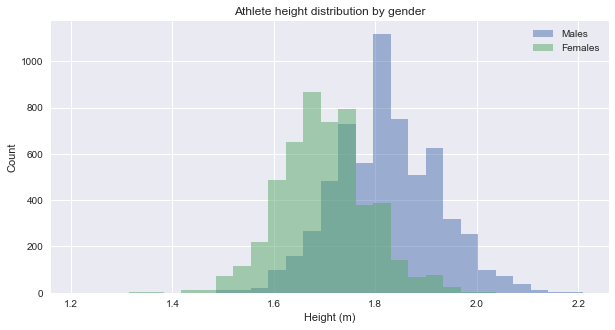

In [21]:
# Define bins ranging from minimum to maximum athlete heights
bins = np.linspace(np.min(athletes['height']), np.max(athletes['height']), 30)

# Plot histogram of height distributions across bins
plt.hist(list(males['height'].dropna()), bins, alpha = 0.5, label = 'Males')
plt.hist(list(females['height'].dropna()), bins, alpha = 0.5, label = 'Females')

# Annotate figure
plt.xlabel('Height (m)')
plt.ylabel('Count')
plt.title('Athlete height distribution by gender')
plt.legend(loc = 'best')

# Save figure and show in notebook
plt.savefig('height_distribution.png')
plt.show()

## 8. Using the Seaborn package create a box plot for male and female height distribution among all participants.

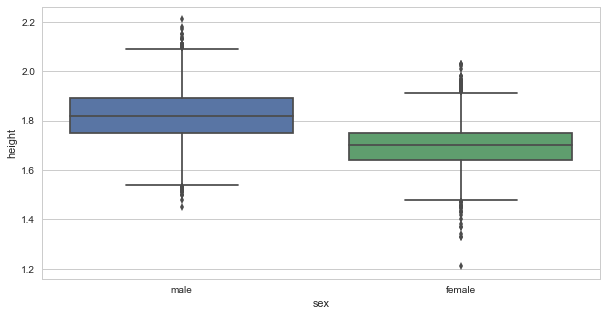

In [22]:
# Create plot
sns.set_style('whitegrid')
ax = sns.boxplot(x = 'sex', y = 'height', data = athletes)

## 9. Create a world map for countries and their respective amount of medals in Carto.

In [23]:
# Select all nations with at least one medal
medalsTotal = by_nation[by_nation['medal_count'] > 0]
medalsTotal.head()

,nationality,medal_count
198,USA,264
72,GER,160
68,GBR,145
159,RUS,115
38,CHN,113


In [24]:
# Read in countries data frame
countries = pd.read_csv('data/countries.csv')
countries.columns = ['country', 'nationality']
countries.head()

,country,nationality
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,ALG
3,American Samoa*,ASA
4,Andorra,AND


In [25]:
# Merge medalsTotal and countries data sets
medalsTotal = medalsTotal.merge(countries, how = 'left', on = 'nationality')
medalsTotal.head()

,nationality,medal_count,country
0,USA,264,United States
1,GER,160,Germany
2,GBR,145,United Kingdom
3,RUS,115,Russia
4,CHN,113,China


In [26]:
# Export as csv, load on 'Carto.com'
medalsTotal.to_csv('top_countries.csv')

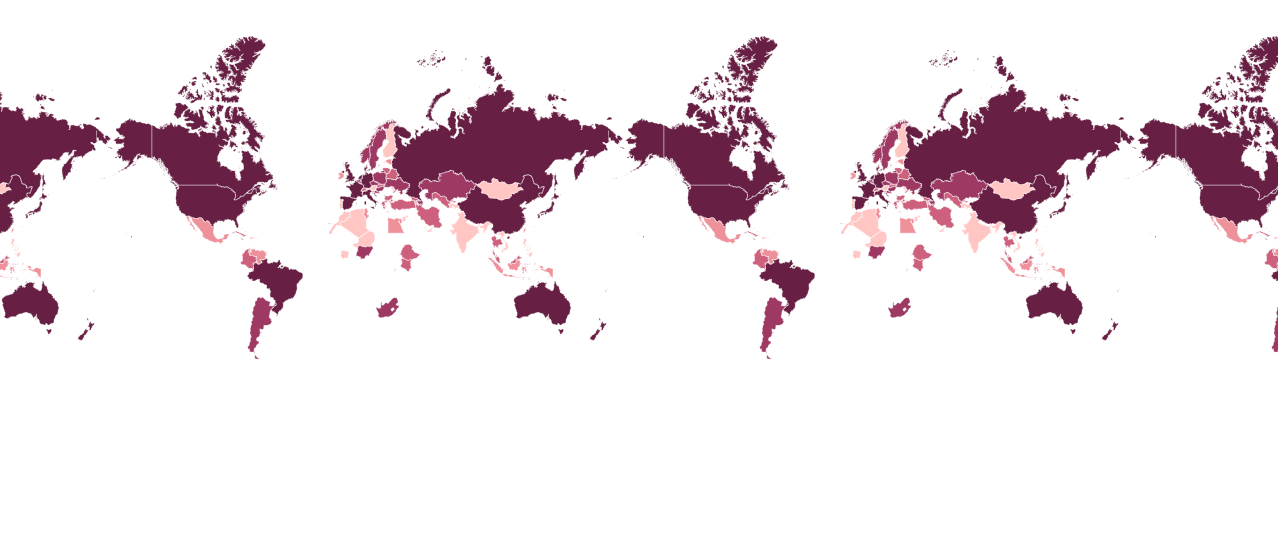

## 10. _Optional_: What else would you try?

### Which sport has the tallest male and female athletes?

In [27]:
# Which sport has the tallest male athletes?
males_bySport = males.groupby('sport')['height'].mean().reset_index()
males_bySport = males_bySport.sort_values(by = 'height', ascending = False)
males_bySport.head()

,sport,height
4,basketball,2.003611
25,volleyball,1.964010
13,handball,1.913169
17,rowing,1.898708
22,taekwondo,1.863750


In [28]:
# Which sport has the tallest female athletes?
females_bySport = females.groupby('sport')['height'].mean().reset_index()
females_bySport = females_bySport.sort_values(by = 'height', ascending = False)
females_bySport.head()

,sport,height
4,basketball,1.833819
25,volleyball,1.828691
17,rowing,1.773286
13,handball,1.759722
23,tennis,1.734205


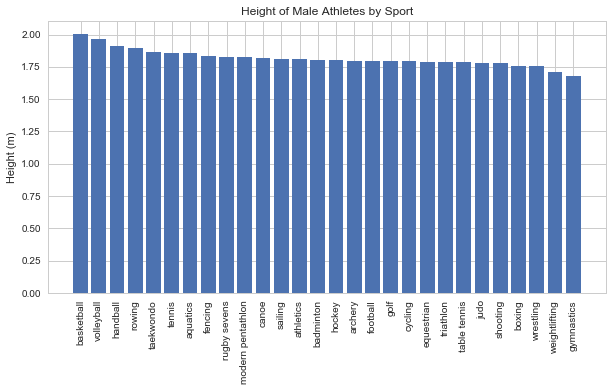

In [29]:
# Barplot of male heights per sport
y_pos = np.arange(len(males_bySport['sport']))
plt.bar(y_pos, males_bySport['height'], align = 'center')
plt.xticks(y_pos, males_bySport['sport'], rotation = 90)
plt.ylabel('Height (m)')
plt.title('Height of Male Athletes by Sport')

# Save plot and show in notebook
plt.savefig('MaleHeightBySport.png')
plt.show()

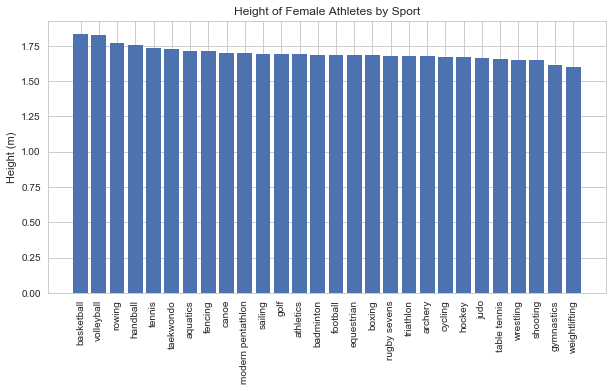

In [30]:
# Barplot of female heights per sport
y_pos = np.arange(len(females_bySport['sport']))
plt.bar(y_pos, females_bySport['height'], align = 'center')
plt.xticks(y_pos, females_bySport['sport'], rotation = 90)
plt.ylabel('Height (m)')
plt.title('Height of Female Athletes by Sport')

# Save plot and show in notebook
plt.savefig('FemaleHeightBySport.png')
plt.show()